In [1]:
import librosa
import numpy as np
import os
import matplotlib.pyplot as plt
import Process_Data.constants as c
from scipy import interpolate

from Misc.analysis import format_eer_file, read_eer_file, format_eer_file_train, format_eer_file_eval
%matplotlib inline

In [19]:
frl_result = 'ResNet18	sgd	40	4.31	0.3779	0.4570 \
ResNet18	sgd+frl	40	4.43	0.3826	0.4707 \
ResNet18	sgd	64	4.31	0.3779	0.4570 \
ResNet18	sgd+frl	64	4.43	0.3826	0.4707 \
ResNet18	sgd	80	4.02	0.3877	0.4784 \
ResNet18	sgd+frl	80	3.90	0.3449	0.4216 \
ResNet18	sgd	161	3.71	0.3433	0.3821 \
ResNet18	sgd+frl	161	3.74	0.3257	0.3442'

In [20]:
results = []
results_frl = []
for l in frl_result.split(' '):
    lsplit = l.split()
    feat_dim = int(lsplit[2])
    eer = float(lsplit[3])
    dcf = float(lsplit[4])
    
    if 'frl' in lsplit[1]:
        results_frl.append([feat_dim, eer, dcf])
    else:
        results.append([feat_dim, eer, dcf])

In [21]:
results = np.array(results)
results_frl = np.array(results_frl)

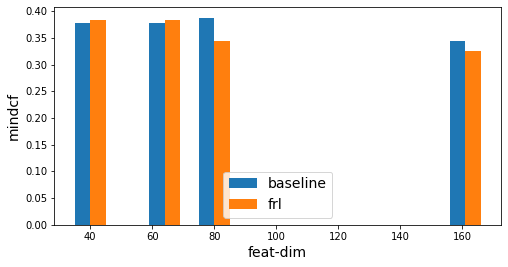

In [29]:
plt.figure(figsize=(8, 4))

# plt.plot(results[:,0], results[:,2], '--', marker='.')
# plt.plot(results_frl[:,0], results_frl[:, 2], '--', marker='.')

plt.bar(results[:,0]-2.5, results[:,2], width=5)
plt.bar(results_frl[:,0]+2.5, results_frl[:, 2], width=5)

plt.xlabel('feat-dim', fontsize=14)
plt.ylabel('mindcf', fontsize=14)

plt.legend(['baseline', 'frl'], fontsize=14)
plt.savefig('gfa/frl.png', bbox_inches='tight')